In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import ast
from sklearn.metrics import accuracy_score, classification_report

In [8]:
train=pd.read_csv("/content/drive/MyDrive/AOCD_assignment/full_train.csv")
val=pd.read_csv("/content/drive/MyDrive/AOCD_assignment/hybrid_validation.csv")
test=pd.read_csv("/content/drive/MyDrive/AOCD_assignment/hybrid_test.csv")

In [ ]:
# train2=pd.read_csv("/content/drive/MyDrive/AOCD_assignment/Data/preprocessed_features_train.csv")
# val2=pd.read_csv("/content/drive/MyDrive/AOCD_assignment/Data/preprocessed_features_validation.csv")

In [11]:
train.head()

,product_action_symb,nevents,weekend,part_day,total_time,products_viewed,nview,ndetail,nremove,convert,time_since_last_event
0,"[1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, ...",18,0,evening,3478.696,5,12,3,0,0,"[0.0, 998.119, 6.436, 21.993, 281.069, 166.031..."
1,"[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...",41,1,evening,2612.011,9,19,4,0,0,"[288.871, 9.353, 0.0, 11.943, 28.894, 310.141,..."
2,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, ...",44,0,night,2692.056,22,11,0,18,1,"[0.0, 44.073, 47.157, 5.913, 7.943, 43.287, 4...."
3,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 3, 1]",15,1,night,391.502,4,3,1,0,0,"[33.984, 74.485, 37.651, 50.508, 41.415, 22.44..."
4,"[2, 1, 3, 1]",4,0,afternoon,92.009,2,1,0,0,0,"[0.0, 9.082, 82.927]"


In [12]:
test.head()

,product_action_symb,nevents,weekend,part_day,total_time,products_viewed,nview,ndetail,nremove,convert,time_since_last_event
0,"[2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, ...",33,0,afternoon,253.346,15,6,4,0,0,"[0.0, 5.679, 0.0, 4.032, 0.0, 4.651, 43.525, 0..."
1,"[1, 1, 1, 1, 2, 3, 4, 1, 2, 1, 1, 1, 4, 4, 4, 1]",16,0,afternoon,214.940,7,5,1,4,1,"[34.852, 9.892, 17.623, 0.0, 94.796, 4.921, 1...."
2,"[1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, ...",31,0,evening,392.800,10,7,2,0,0,"[17.785, 70.111, 7.879, 17.982, 0.0, 11.284, 0..."
3,"[1, 2, 3, 1, 4, 3, 4, 1, 1, 1, 2, 1, 2]",13,0,night,214.671,7,5,2,2,0,"[0.0, 18.83, 8.853, 62.531, 0.368, 13.291, 15...."
4,"[2, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, ...",17,0,evening,464.860,4,10,0,0,0,"[0.0, 168.34, 0.0, 7.84, 0.0, 75.172, 5.839, 1..."


In [13]:
val.head()

,product_action_symb,nevents,weekend,part_day,total_time,products_viewed,nview,ndetail,nremove,convert,time_since_last_event,page_id_encoded,time_on_pages
0,"[2, 1, 2, 1, 3]",5,0,night,50.053,3,0,0,0,0,"[0.0, 24.75, 0.0, 25.303]","[4846, 4846, 107552, 107552, 136348]","[(4846, 24.75), (107552, 25.303), (136348, 0.0)]"
1,"[2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, ...",31,0,evening,2609.605,8,3,1,0,0,"[0.0, 49.375, 30.515, 15.859, 16.495, 15.43, 3...","[80644, 80644, 96576, 68362, 68362, 17467, 588...","[(80644, 49.375), (96576, 30.515), (68362, 32...."
2,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3]",11,0,afternoon,446.969,3,0,0,0,0,"[58.205, 0.0, 128.905, 16.74, 17.545, 140.15, ...","[4227, 155691, 155691, 68362, 245162, 68362, 4...","[(4227, 58.205), (155691, 128.905), (68362, 16..."
3,"[1, 1, 1, 1, 1, 3, 1, 1, 1]",9,0,night,754.017,1,3,0,0,1,"[7.698, 21.282, 10.751, 30.3, 41.078, 16.84, 1...","[69975, 69975, 193198, 48332, 201775, 136348, ...","[(69975, 28.98), (193198, 10.751), (48332, 30...."
4,"[2, 1, 2, 1, 3, 1, 1, 1]",8,0,night,455.835,3,3,0,0,1,"[0.0, 102.105, 0.0, 16.581, 12.689, 16.003, 30...","[255807, 255807, 255807, 255807, 136348, 59156...","[(255807, 118.686), (136348, 12.689), (59156, ..."


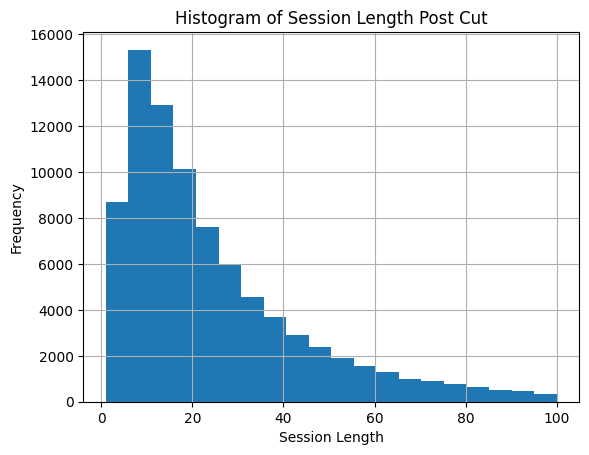

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation (replace this with your actual DataFrame)
# df = pd.DataFrame({
#     'session_length_postcut': [10, 20, 30, 20, 15, 25, 35, 20, 15, 10, 25, 30, 5, 40]
# })

# Now, let's say df is your actual DataFrame and 'session_length_postcut' is your column of interest.
# Plotting the histogram:
train['nevents'].hist(bins=20)  # You can adjust the number of bins as needed
plt.title('Histogram of Session Length Post Cut')
plt.xlabel('Session Length')
plt.ylabel('Frequency')
plt.show()

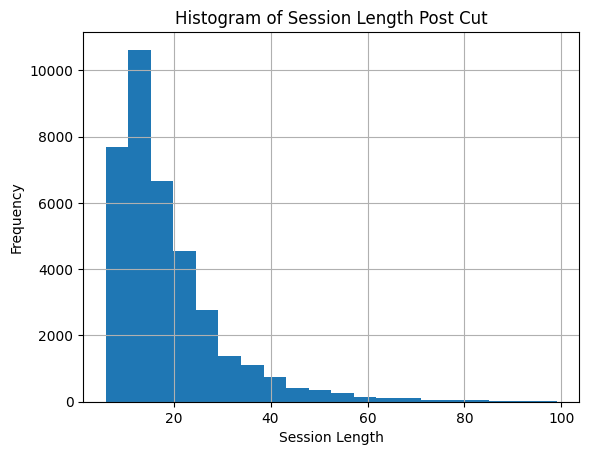

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation (replace this with your actual DataFrame)
# df = pd.DataFrame({
#     'session_length_postcut': [10, 20, 30, 20, 15, 25, 35, 20, 15, 10, 25, 30, 5, 40]
# })

# Now, let's say df is your actual DataFrame and 'session_length_postcut' is your column of interest.
# Plotting the histogram:
test['nevents'].hist(bins=20)  # You can adjust the number of bins as needed
plt.title('Histogram of Session Length Post Cut')
plt.xlabel('Session Length')
plt.ylabel('Frequency')
plt.show()

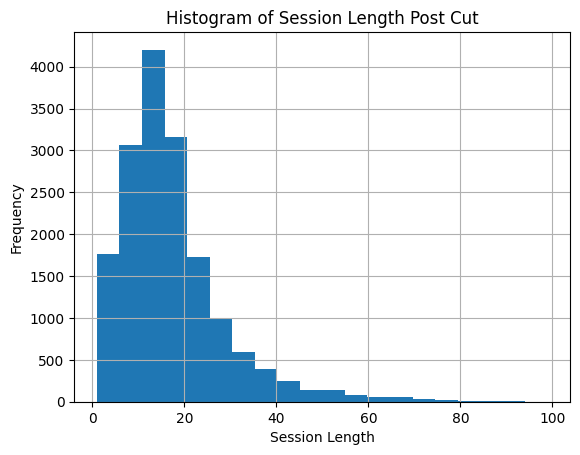

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame creation (replace this with your actual DataFrame)
# df = pd.DataFrame({
#     'session_length_postcut': [10, 20, 30, 20, 15, 25, 35, 20, 15, 10, 25, 30, 5, 40]
# })

# Now, let's say df is your actual DataFrame and 'session_length_postcut' is your column of interest.
# Plotting the histogram:
val['nevents'].hist(bins=20)  # You can adjust the number of bins as needed
plt.title('Histogram of Session Length Post Cut')
plt.xlabel('Session Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
train["product_action_symb2"] = train["product_action_symb"].apply(lambda x: list(ast.literal_eval(x.strip('[]'))))
val["product_action_symb2"] = val["product_action_symb"].apply(lambda x: list(ast.literal_eval(x.strip('[]'))))

In [ ]:
import numpy as np

def ngram_featurizer(session, n):

    """takes in a list and an integer defining the size of ngrams.
     Returns the ngrams of desired size in the input string"""

    session = ['#']*(n-1) + session + ['+']*(n-1)
    ngrams = [tuple(session[i:i+n]) for i in range(len(session)-n+1)]

    return ngrams


def encode_sessions(sessions, n, mapping=None):

    """
    Takes in a list of lists, an integer indicating the character ngrams' size,
    and a dictionary mapping ngrams to numerical indices. If no dictionary is passed,
    one is created inside the function.
    The function outputs a 2d NumPy array with as many rows as there are strings in
    the input list, and the mapping from ngrams to indices, representing the columns
    of the NumPy array.
    """

    if not mapping:
        all_ngrams = set()
        for session in sessions:
            all_ngrams = all_ngrams.union(set(ngram_featurizer(session, n)))

        mapping = {ngram: i for i, ngram in enumerate(all_ngrams)}

    X = np.zeros((len(sessions), len(mapping)))
    for i, session in enumerate(sessions):
        for ngram in ngram_featurizer(session, n):
            try:
                X[i, mapping[ngram]] += 1
            except KeyError:
                pass

    return X, mapping

In [ ]:
X_train2, mapping = encode_sessions(X_resampled_series, 4)
X_val2, _ = encode_sessions(X_val, 4, mapping=mapping)
print(mapping, end=' ')

{(4, 2, 1, '+'): 0, (4, 1, 2, 4): 1, (2, 3, 1, 4): 2, (1, 2, 1, 1): 3, (4, 1, 2, '+'): 4, ('#', '#', 4, 1): 5, (2, 1, 1, 1): 6, (1, 4, 3, 1): 7, (4, 4, 3, 4): 8, (1, 3, 1, 4): 9, (1, 1, 2, 3): 10, (4, 4, 3, '+'): 11, (1, 3, 1, '+'): 12, (1, 2, 1, 3): 13, (3, 1, 1, 2): 14, ('#', '#', 4, 3): 15, ('#', 3, 2, 1): 16, (4, 3, 3, 1): 17, (2, 1, 1, 3): 18, (1, 1, 3, '+'): 19, (1, 4, 3, 3): 20, (3, 3, 3, 2): 21, (2, 4, 2, 1): 22, (3, 4, 3, 2): 23, (2, 1, 4, 2): 24, (2, 3, 4, 4): 25, (1, 2, 4, 1): 26, (3, 1, 2, 2): 27, (3, 1, 1, 4): 28, ('#', 1, 2, 1): 29, (4, 3, 3, 3): 30, (2, 2, 2, 1): 31, (3, 3, 3, 4): 32, ('#', 4, 3, 1): 33, ('#', 1, 3, 2): 34, (4, 1, 2, 1): 35, ('#', 3, 3, 4): 36, (3, 3, 3, '+'): 37, (3, 4, 4, 2): 38, (2, 3, 1, 1): 39, (3, 4, 3, 4): 40, ('#', '#', 1, 2): 41, (2, 1, 4, 4): 42, (1, 2, 4, 3): 43, (3, 1, 2, 4): 44, (3, '+', '+', '+'): 45, ('#', 1, 2, 3): 46, (2, 4, 3, '+'): 47, (3, 1, 2, '+'): 48, (4, 4, 1, 1): 49, (1, 3, 1, 1): 50, (3, 3, '+', '+'): 51, ('#', 1, 3, 4): 52, (3,

In [ ]:
train.describe()

,addcart,convert,nevents,length
count,62408.0,62408.000000,62408.000000,62408.000000
mean,1.0,0.223721,25.534210,25.534210
std,0.0,0.416741,19.754783,19.754783
min,1.0,0.000000,5.000000,5.000000
25%,1.0,0.000000,11.000000,11.000000
50%,1.0,0.000000,19.000000,19.000000
75%,1.0,0.000000,34.000000,34.000000
max,1.0,1.000000,100.000000,100.000000


In [ ]:
X_train=train["product_action_symb2"]
y_train=train["convert"]
X_val=val["product_action_symb2"]
y_val=val["convert"]

In [ ]:
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# Assuming df is your DataFrame containing the sequential data with columns named "sequence"

# One-hot encode the sequences
encoded_sequences = []
for sequence in train["product_action_symb2"]:
    encoded_sequence = to_categorical(sequence, num_classes=4)  # Assuming 4 classes (0, 1, 2, 3)
    encoded_sequences.append(encoded_sequence)

# Pad the sequences
max_length = 35  # Assuming you want to pad sequences to a maximum length of 35
padded_sequences = pad_sequences(encoded_sequences, maxlen=max_length, padding='post')

# Convert the padded sequences back to DataFrame
padded_df = pd.DataFrame(padded_sequences)

# Assuming you want to concatenate the padded sequences with the original DataFrame
# df_padded = pd.concat([df.drop(columns=['sequence']), padded_df], axis=1)


IndexError: index 4 is out of bounds for axis 1 with size 4

In [ ]:
X_train=X_train.reshape(-1,1)

In [ ]:
X_val=X_val.reshape(-1,1)

In [ ]:
y_train.shape
# type(y_train)

(62408,)

In [ ]:
import numpy as np

print(type(X_train))
print(type(y_train))

# If not numpy arrays, convert them
X_train = np.array(X_train)
y_train = np.array(y_train)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
import numpy as np

# Assuming X_train is a numpy array with nested sequences
# Example with nested lists:
# X_train = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Flatten nested sequences
X_train_flat = np.concatenate(X_train)

# Convert elements to float (assuming they are numbers)
X_train_flat = X_train_flat.astype(float)


ValueError: setting an array element with a sequence.

In [ ]:
from itertools import chain

# Flatten the list of lists
X_train_flattened = list(chain.from_iterable(X_train))

# Convert elements to float
X_train_flattened = np.array(X_train_flattened).astype(float)



ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (62408,) + inhomogeneous part.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
# Assuming X_train and y_train are your data and labels
smote = SMOTE(random_state=0)
ros=RandomOverSampler(random_state=42)
# Resample the dataset
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
X_resampled_series = pd.Series(X_resampled.flatten())
y_resampled_series = pd.Series(y_resampled)
# Check the new class distribution
print("Class distribution after resampling:", {label: count for label, count in zip(*np.unique(y_resampled, return_counts=True))})


Class distribution after resampling: {0: 48446, 1: 48446}


In [ ]:
len(X_resampled)

72669

In [ ]:
X_resampled_series.shape

(96892,)

In [ ]:
X_val.shape

(15603, 1)

In [ ]:
X_resampled[0]

array([list([1, 1, 2, 1, 3, 1, 1, 1])], dtype=object)

In [ ]:
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()

In [ ]:
X_train.shape
# type(X_resampled)
# y_resampled.shape

(62408, 1)

In [ ]:
type(X_train)

pandas.core.series.Series

In [ ]:
y_train = y_train.values


In [ ]:
y_val=y_val.values

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming X_train is your NumPy array of lists
X_train_padded = pad_sequences(X_resampled_series, maxlen=100,padding='post', dtype='int32')
X_val_padded= pad_sequences(X_val, maxlen=100,padding='post', dtype='int32')
# Reshape for RNN input
X_train_series = np.reshape(X_train_padded, (X_train_padded.shape[0], X_train_padded.shape[1], 1))
X_val_series = np.reshape(X_val_padded, (X_val_padded.shape[0], X_val_padded.shape[1], 1))
# Print the shape
print('Train set shape:', X_train_series.shape)
print('Val set shape:', X_val_series.shape)

Train set shape: (96892, 100, 1)
Val set shape: (15603, 100, 1)


In [ ]:
X_val.shape

(15603, 1)

In [ ]:
X_train_series = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val_series = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

In [ ]:
import numpy as np
from keras.utils import to_categorical

# Assuming X_train is your 3D array with shape (96892, 35, 1)

# Reshape the array to remove the last dimension
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1])

# Perform one-hot encoding
X_train_encoded = to_categorical(X_train_reshaped, num_classes=4)

# Reshape the encoded array to its original shape
X_train_encoded = X_train_encoded.reshape(X_train.shape[0], X_train.shape[1], 4)


ValueError: setting an array element with a sequence.

In [ ]:
X_train2.shape

(96892, 312)

In [ ]:
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Dropout, Embedding, MaxPooling1D
from keras.layers import SimpleRNN, LSTM, GRU, Bidirectional
import keras
import tensorflow as tf
keras.backend.clear_session()

def build_model(recurrent_layer_type):
    ### PUT YOUR CODE HERE ###
    model=Sequential()
    model.add(Embedding(input_dim=4, output_dim=256, input_length=312))
    model.add((recurrent_layer_type(256, activation='tanh',return_sequences=True)))  # Dont have to add shape[0] bc dont have to tell how many samples u have
    # model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add((recurrent_layer_type(128, activation='tanh')))
    model.add(Dropout(0.2))
    # model.add(tf.keras.layers.Flatten())
    model.add(Dense(64, activation="relu"))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model
    ### END ###

In [ ]:
    model = build_model(LSTM)
    model.summary()
    history = model.fit(X_train2, y_resampled_series, validation_data = (X_val2, y_val), epochs = 5,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 312, 256)          1024      
                                                                 
 lstm (LSTM)                 (None, 312, 256)          525312    
                                                                 
 dropout (Dropout)           (None, 312, 256)          0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 6

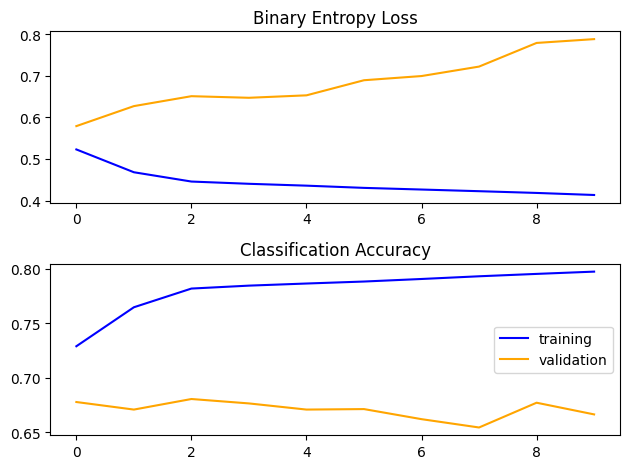

In [ ]:
import matplotlib.pyplot as plt
# Loss/Accuracy graph
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Binary Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='val')

	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='val')
	plt.legend(['training', 'validation'])
	plt.tight_layout()
	plt.show()
summarize_diagnostics(history)

488/488 [==============================] - 9s 15ms/step
Confusion Matrix:
[[7744 4372]
 [1469 2018]]


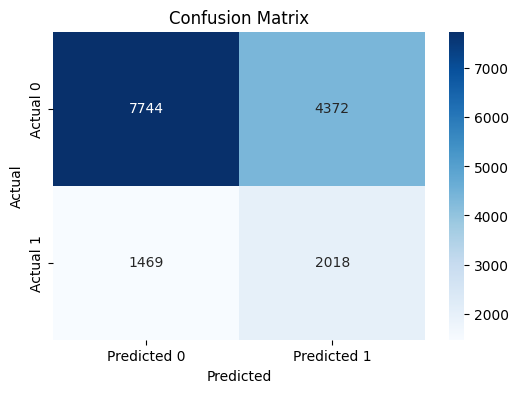

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true and predicted labels, respectively
# Replace them with the actual arrays or lists from your model
y_pred = model.predict(X_val2)
y_pred = np.where(y_pred >= 0.5, 1, 0)
# Create confusion matrix
conf_mat = confusion_matrix(y_val, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
y_pred

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[1],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[0],
        [0],
        [1],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]]])

In [ ]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
y_val

0        1
1        1
2        0
3        0
4        1
        ..
15598    0
15599    0
15600    0
15601    0
15602    0
Name: convert, Length: 15603, dtype: int64

In [ ]:
len(y_train)

62408

In [ ]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.64      0.73     12116
           1       0.32      0.58      0.41      3487

    accuracy                           0.63     15603
   macro avg       0.58      0.61      0.57     15603
weighted avg       0.72      0.63      0.66     15603



In [ ]:
sequence_length = 5

X_lstm = X_train_padded.reshape((-1, sequence_length, 1))

print(X_lstm.shape)
print(X_lstm)

ValueError: cannot reshape array of size 62408 into shape (5,1)